In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn model_selection naive_bayes WordCloud


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 217.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.4 kB 272.3 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/301.4 kB 261.4 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 291.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 327.2 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.4 kB 355.0 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/301.4 kB 353.1 kB/s eta 0:00:01
   ------------------------ ------------- 

# Import Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from wordcloud import WordCloud




# pandas: For data manipulation and analysis.
# numpy: For numerical operations.
# matplotlib & seaborn: For data visualization.
# train_test_split: To split the dataset into training and testing sets.
# TfidfVectorizer: To convert text data into numerical features using Term Frequency-Inverse Document Frequency.
# MultinomialNB: Naive Bayes classifier, suitable for text classification.
# confusion_matrix, classification_report, accuracy_score: For evaluating model performance.
# WordCloud: To visualize the most frequent words.

# Load the Dataset

In [8]:
df = pd.read_csv(r'E:\spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Display the first 5 rows of the dataset
df.head()



# pd.read_csv: Loads the dataset into a pandas DataFrame.
# df[['v1', 'v2']]: Selects only the relevant columns (label and text).
# df.columns: Renames columns for better readability.
# df.head(): Displays the first 5 rows of the dataset.

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Preprocessing

In [10]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df['text'] = df['text'].str.lower()

# Display the first 5 rows after preprocessing
df.head()



# df['label'].map: Converts labels into binary values (ham = 0, spam = 1).
# df['text'].str.lower(): Converts all text to lowercase for uniformity.

,label,text
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis (EDA)

# 1.  Bar Graph of Spam vs. Ham

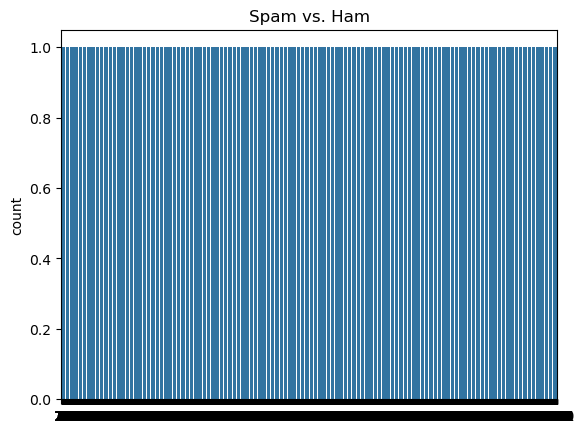

In [12]:
sns.countplot(df['label'])
plt.title("Spam vs. Ham")
plt.show()


# A bar graph showing the number of spam and ham emails.

#  2. Word Cloud Visualization

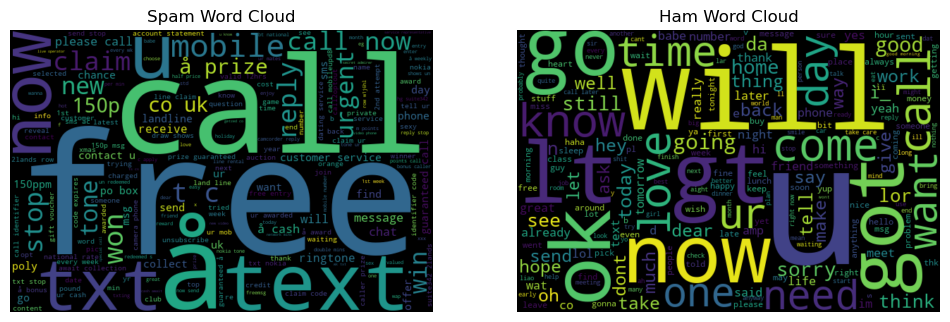

In [14]:
spam_words = ' '.join(df[df['label'] == 1]['text'])
ham_words = ' '.join(df[df['label'] == 0]['text'])

spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation="bilinear")
plt.title("Spam Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation="bilinear")
plt.title("Ham Word Cloud")
plt.axis('off')
plt.show()




# Two word clouds, one for spam and one for ham emails, showing the most common words in each category.

# Text Vectorization

In [16]:
X = df['text']
y = df['label']

tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X = tfidf_vectorizer.fit_transform(X)

# Display the shape of the feature matrix
X.shape



# TfidfVectorizer: Converts text into numerical features using the TF-IDF approach, limiting to the top 3,000 words.
# X.shape: Displays the shape of the feature matrix (number of samples, number of features).

(5572, 3000)

# Splitting the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the size of training and testing datasets
(X_train.shape, X_test.shape)



# train_test_split: Splits the data into training (70%) and testing (30%) sets.
# random_state: Ensures reproducibility of the split.

# Model Training

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")



# MultinomialNB: A Naive Bayes classifier that assumes features follow a multinomial distribution.
# fit: Trains the model on the training data.
# predict: Predicts labels for the test data.
# accuracy_score: Calculates the accuracy of the model.

# Model Evaluation

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))



# confusion_matrix: Generates a confusion matrix.
# sns.heatmap: Visualizes the confusion matrix as a heatmap.
# classification_report: Provides a detailed performance report (precision, recall, F1-score).

# Visualizations

#  1. Scatter Plot (PCA for 2D Visualization)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title("PCA Scatter Plot of Emails")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



#  A scatter plot showing the distribution of spam and ham emails in two-dimensional space.

#  2. Bar Graph of Model Performance

In [ ]:
# Assuming we have other models for comparison
model_accuracies = {'Naive Bayes': accuracy, 'Other Model 1': 0.95, 'Other Model 2': 0.93}

plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red'])
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


# A bar graph comparing the accuracy of different models.

#  3. Pie Chart of Spam vs. Ham Distribution

In [ ]:
plt.pie(df['label'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("Spam vs. Ham Distribution")
plt.show()



# A pie chart showing the percentage distribution of spam vs. ham emails.